In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('total_merge.csv')

In [3]:
timestep = 30

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['cnt'] = (df['timestamp'].dt.hour*60 + df['timestamp'].dt.minute)//timestep

In [5]:
df = df.groupby(['Date','cnt']).mean()
df = df.reset_index()

C:\Users\minseok\AppData\Local\Temp\ipykernel_43968\459440694.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['Date','cnt']).mean()


In [6]:
df = df[(df['hour']<=22) & (df['hour']>=8)]

In [7]:
df

,Date,cnt,1F_temp,2F_temp,3F_temp,4F_temp,5F_temp,E1_L1/A_demand,E6_L1/A_demand,E7_L1/A_demand,E8_L1/A_demand,E9_L1/A_demand,E10_L1/A_demand,TA,CA,instant_headcount,cumulative_headcount,hour
16,2023-03-23,16,18.949722,20.842722,22.518667,23.198333,24.317944,13.100000,61.633333,-59.800000,57.500000,0.000000,38.666667,12.745000,10.000000,0.000000,0.000000,8.0
17,2023-03-23,17,18.829167,21.365000,23.078278,23.754889,24.553444,-2.466667,56.533333,-56.033333,53.600000,0.000000,36.800000,13.045000,10.000000,0.000000,0.000000,8.0
18,2023-03-23,18,18.312944,21.550778,23.394111,24.092278,24.271722,-2.333333,43.433333,-55.733333,53.600000,-0.033333,36.700000,12.668333,10.000000,0.100000,1.077667,9.0
19,2023-03-23,19,18.146778,21.664778,23.578333,24.320778,24.138889,-2.333333,23.866667,-36.933333,54.700000,-0.033333,16.866667,11.568333,10.000000,0.933333,3.749667,9.0
20,2023-03-23,20,19.240222,22.169889,23.974111,24.645722,24.061778,35.466667,24.766667,-28.000000,56.166667,0.000000,-2.900000,10.927500,10.000000,1.433333,46.635667,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,2023-10-11,41,21.122444,22.668722,19.838667,23.125000,23.144444,2312.700000,913.066667,3527.533333,-4.500000,-4.700000,-0.066667,13.755000,1.741667,2.500000,115.760000,20.0
4986,2023-10-11,42,20.989833,22.797722,19.819667,23.125000,23.648611,2334.700000,858.033333,3646.266667,-5.033333,384.466667,-0.066667,13.479167,1.516667,2.200000,68.899000,21.0
4987,2023-10-11,43,21.012778,22.864556,19.830389,23.125000,23.567389,1547.266667,596.933333,1923.933333,29.400000,891.166667,35.966667,13.229167,0.516667,0.666667,47.229667,21.0
4988,2023-10-11,44,21.533833,22.974833,20.737056,23.125000,23.725167,-1.300000,25.466667,-1.500000,54.766667,-2.133333,35.333333,13.148333,0.725000,0.133333,8.499333,22.0


In [8]:
df = df[['5F_temp','TA','CA','instant_headcount','cumulative_headcount','cnt','E10_L1/A_demand']].reset_index(drop=True)

In [9]:
df

,5F_temp,TA,CA,instant_headcount,cumulative_headcount,cnt,E10_L1/A_demand
0,24.317944,12.745000,10.000000,0.000000,0.000000,16,38.666667
1,24.553444,13.045000,10.000000,0.000000,0.000000,17,36.800000
2,24.271722,12.668333,10.000000,0.100000,1.077667,18,36.700000
3,24.138889,11.568333,10.000000,0.933333,3.749667,19,16.866667
4,24.061778,10.927500,10.000000,1.433333,46.635667,20,-2.900000
...,...,...,...,...,...,...,...
3115,23.144444,13.755000,1.741667,2.500000,115.760000,41,-0.066667
3116,23.648611,13.479167,1.516667,2.200000,68.899000,42,-0.066667
3117,23.567389,13.229167,0.516667,0.666667,47.229667,43,35.966667
3118,23.725167,13.148333,0.725000,0.133333,8.499333,44,35.333333


In [10]:
df['Y'] = df['5F_temp'].shift(-1)

In [11]:
df = df.dropna()

In [12]:
df

,5F_temp,TA,CA,instant_headcount,cumulative_headcount,cnt,E10_L1/A_demand,Y
0,24.317944,12.745000,10.000000,0.000000,0.000000,16,38.666667,24.553444
1,24.553444,13.045000,10.000000,0.000000,0.000000,17,36.800000,24.271722
2,24.271722,12.668333,10.000000,0.100000,1.077667,18,36.700000,24.138889
3,24.138889,11.568333,10.000000,0.933333,3.749667,19,16.866667,24.061778
4,24.061778,10.927500,10.000000,1.433333,46.635667,20,-2.900000,24.025611
...,...,...,...,...,...,...,...,...
3114,22.360389,14.055000,1.241667,4.733333,108.473333,40,-0.066667,23.144444
3115,23.144444,13.755000,1.741667,2.500000,115.760000,41,-0.066667,23.648611
3116,23.648611,13.479167,1.516667,2.200000,68.899000,42,-0.066667,23.567389
3117,23.567389,13.229167,0.516667,0.666667,47.229667,43,35.966667,23.725167


In [13]:
X = np.array(df.drop(['Y'],axis=1))
Y = np.array(df[['Y']])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
def mlp():
    model = Sequential()
    model.add(Dense(64,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1))
    return model

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.15, shuffle=True)
scaler_x = MinMaxScaler()
train_x = scaler_x.fit_transform(train_x)
test_x = scaler_x.transform(test_x)
scaler_y = MinMaxScaler()
train_y = scaler_y.fit_transform(train_y.reshape(-1,1))
test_y = scaler_y.transform(test_y.reshape(-1,1))
model = mlp()
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(train_x, train_y, validation_split=0.2, epochs=1000, batch_size=128, verbose=1, callbacks=[callback])
pred = model.predict(test_x)
pred = scaler_y.inverse_transform(pred)
real = scaler_y.inverse_transform(test_y)

Epoch 1/1000
17/17 [==============================] - 1s 12ms/step - loss: 0.0568 - val_loss: 0.0179
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0097
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0036
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.001

In [18]:
import matplotlib.pyplot as plt

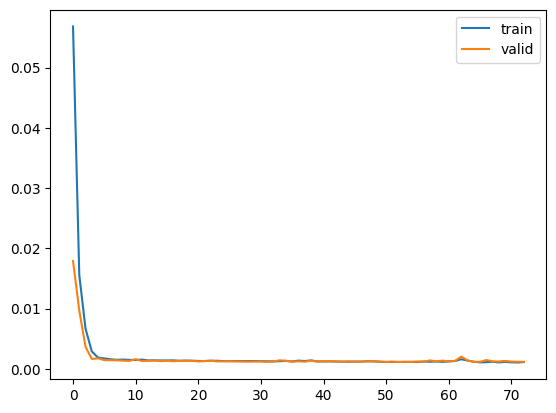

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()

In [20]:
rmse = mean_squared_error(real,pred,squared=False)
cvrmse = rmse/np.average(real)

In [21]:
print(rmse)
print(cvrmse)

0.3549128741526258
0.014596404039436937


In [22]:
mape = mean_absolute_percentage_error(real,pred)

In [23]:
mape

0.008793676169659804

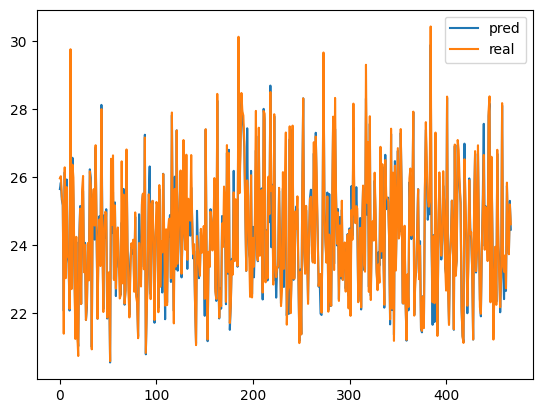

In [24]:
plt.plot(pred, label='pred')
plt.plot(real, label='real')
plt.legend()

In [25]:
min = np.min(real)
max = np.max(real)

Text(0, 0.5, 'pred')

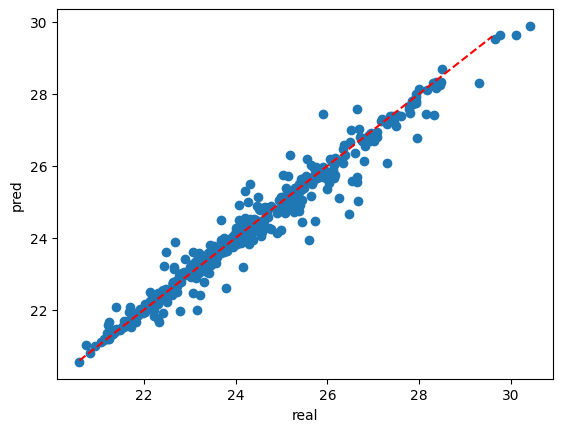

In [26]:
plt.scatter(real,pred)
plt.plot(np.arange(min,max),np.arange(min,max), color='red', linestyle='--')
plt.xlabel('real')
plt.ylabel('pred')

Text(0, 0.5, 'count')

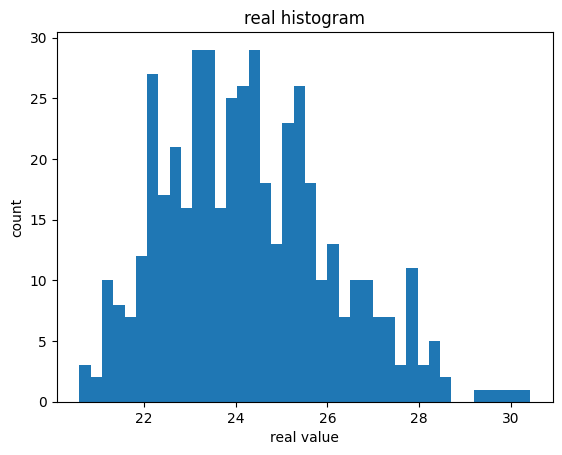

In [27]:
plt.hist(real, bins=40)
plt.title('real histogram')
plt.xlabel('real value')
plt.ylabel('count')

In [28]:
r2 = r2_score(real,pred)

In [29]:
r2

0.9625617586724081

In [30]:
DO, X = [], []

In [31]:
for i in range(10):
    test_x[i][-1] = 0
    max = scaler_x.inverse_transform(test_x[i].reshape(1,-1))[0,-1]
    test_x[i][-1] = 1
    min = scaler_x.inverse_transform(test_x[i].reshape(1,-1))[0,-1]
    input_sample = test_x[i].reshape(1,-1)
    DO_list = []
    x_list = []
    for i in range(100):
        air = 1/100*i
        input_sample[0,-1] = air
        pred = model.predict(input_sample)
        pred = scaler_y.inverse_transform(pred)
        DO_list.append(pred)
        air_size = min + (max-min)/100*i
        x_list.append(air_size)
    DO.append(DO_list)
    X.append(x_list)

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


Text(0.5, 1.0, 'response curve')

c:\Users\minseok\anaconda3\envs\boltzman\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
c:\Users\minseok\anaconda3\envs\boltzman\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
c:\Users\minseok\anaconda3\envs\boltzman\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
c:\Users\minseok\anaconda3\envs\boltzman\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\minseok\anaconda3\envs\boltzman\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\minse

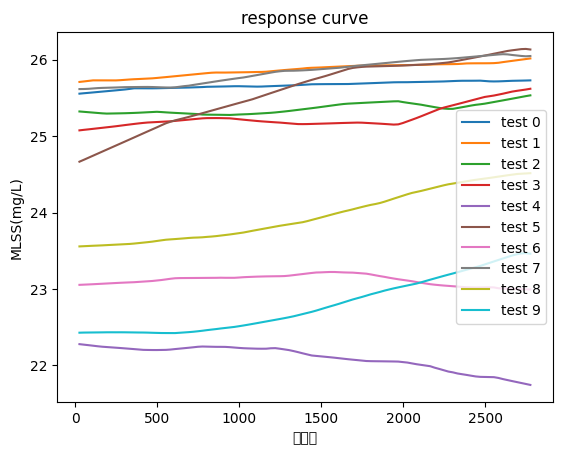

In [32]:
for i in range(10):
    DO_list = DO[i]
    x_list = X[i]
    plt.plot(x_list,np.array(DO_list).reshape(-1,), label=f'test {i}')
plt.legend()
plt.xlabel('인발량')
plt.ylabel('MLSS(mg/L)')
plt.title(f'response curve')

In [33]:
model.save('./dnn/model')

INFO:tensorflow:Assets written to: ./dnn/model\assets


INFO:tensorflow:Assets written to: ./dnn/model\assets


In [34]:
import joblib

In [35]:
file_name = './dnn/scaler_x'
joblib.dump(scaler_x,file_name)

['./dnn/scaler_x']

In [36]:
file_name = './dnn/scaler_y'
joblib.dump(scaler_y,file_name)

['./dnn/scaler_y']